In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * y - y_mean)
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator/denominator
    
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

In [52]:
def predict(x, slope, intercept):
    return slope * x + intercept

In [53]:
def calculate_error(y, y_pred):
    n = len(y)
    
    S_r =  np.sum((y - y_pred) ** 2)
    mse = S_r/n
    
    see = np.sqrt(S_r/(n - 2))
    
    return mse, see

In [54]:
def linear_interpolation(x0, y0, x1, y1, x):
    return y0 + ((y1 -  y0) / (x1 - x0)) * (x - x0)

In [55]:
def calculate_relative_error(true_value, estimated_value):
    return abs((true_value - estimated_value) / true_value) * 100

In [56]:
def quadratic_interpolation(x_vals, y_vals, x):
    x0, x1, x2 = x_vals
    y0, y1, y2 = y_vals
    
    b1 = (y1 - y0) / (x1 - x0)
    
    b2 = ((y2 - y1) / (x2 - x1) - b1) / (x2 - x0)
    
    fx = y0 + b1 * (x - x0) + b2 * (x - x0) * (x - x1)
    
    return fx

$\begin{bmatrix} \textrm{Time} & 6\textrm{AM} & 8\textrm{AM} & 10\textrm{AM} & 12\textrm{AM} & 2\textrm{PM} & 4\textrm{PM} & 6\textrm{PM} \\
\textrm{PM 2.5} & 60 & 160 & 100 & 140 & 120 & 130 & 160 \end{bmatrix}$ \
find PM 2.5 at 7 AM to 11 AM\
selected 3 value is (6, 60), (8,160), (12, 140)

In [57]:
time = [6, 8, 10, 12, 14, 16, 18]
pm = [60, 160, 100, 140, 120, 130, 160]
selected_time = [6, 8, 12]
selected_pm = [60, 160, 140]

## Linear Regression

In [58]:
x = np.array(time, dtype=float)
y = np.array(pm, dtype=float)

slope, intercept = linear_regression(x, y)

y_pred = predict(x, slope, intercept)

print(f"Slope (a1) : {slope}")
print(f"Intercept (a0) : {intercept}")
print(f"Predict Y : {y_pred}")

Slope (a1) : -3.124999999999999
Intercept (a0) : 161.78571428571428
Predict Y : [143.03571429 136.78571429 130.53571429 124.28571429 118.03571429
 111.78571429 105.53571429]


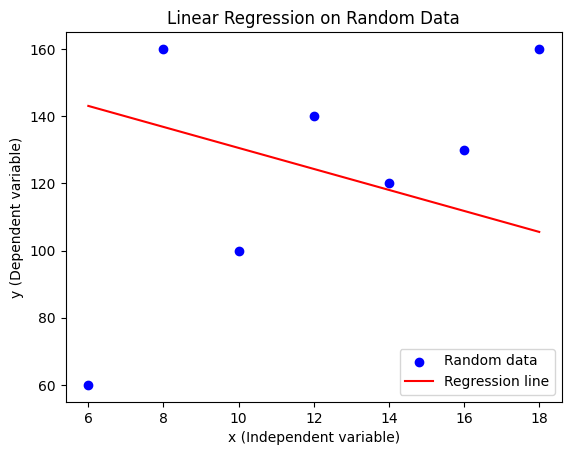

In [59]:
plt.scatter(x, y, color='blue', label='Random data')
plt.plot(np.sort(x), predict(np.sort(x), slope, intercept), color='red',label='Regression line')
plt.xlabel('x (Independent variable)')
plt.ylabel('y (Dependent variable)')
plt.title('Linear Regression on Random Data')
plt.legend()
plt.show()

## Linear Interpolation

In [60]:
##case 1 7AM

x1, y1 = time[0], pm[0] # (6, 60)
x2, y2 = time[1], pm[1] # (8,160)
x = 7

pm_case1 = linear_interpolation(x1, y1, x2, y2, x)

print(f"Case 1 (6AM and 8AM) : Approximated PM at 7AM = {pm_case1 : .6f}")

Case 1 (6AM and 8AM) : Approximated PM at 7AM =  110.000000


In [61]:
#case 2
x1, y1 = time[2], pm[2] # (10, 100)
x2, y2 = time[3], pm[3] # (12,140)
x = 11

pm_case2 = linear_interpolation(x1, y1, x2, y2, x)

print(f"Case 2 (10AM and 12AM) : Approximated PM at 11AM = {pm_case2 : .6f}")

Case 2 (10AM and 12AM) : Approximated PM at 11AM =  120.000000


## Quadratic Interpolation

In [63]:
case_1 = 7
pm_case1 = quadratic_interpolation(selected_time,selected_pm, case_1)
print(f"Approximated PM at 7AM = {pm_case1 : .6f}")

Approximated PM at 7AM =  119.166667


In [64]:
case_2 = 11
pm_case2 = quadratic_interpolation(selected_time,selected_pm, case_2)
print(f"Approximated PM at 11AM = {pm_case2 : .6f}")

Approximated PM at 11AM =  172.500000
